# Plotting with python

The main plotting module in python is `matplotlib`.  There is a lot
that can be done with it - see the [webpage](https://matplotlib.org/gallery/index.html)

## Inside a notebook

Inside a jupyter notebook you get access to this in a slightly
different way, compared to other modules:

In [6]:
%matplotlib inline

This only needs to be done once in a notebook, like for standard imports.

> There are also interactive versions - see the practical on Jupyter notebooks for more information about this.


The library works very similarly to plotting in matlab.  Let's start
with some simple examples.

### 2D plots

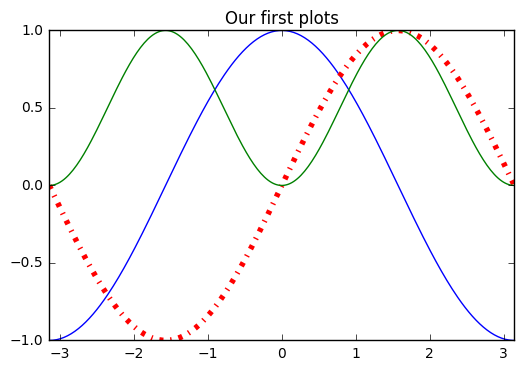

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, 256)
cosx, sinx = np.cos(x), np.sin(x)

plt.plot(x, cosx)
plt.plot(x, sinx, color='red', linewidth=4, linestyle='-.')
plt.plot(x, sinx**2)
plt.xlim(-np.pi, np.pi)
plt.title('Our first plots')

### Histograms and bar charts

For a simple histogram you can do this:

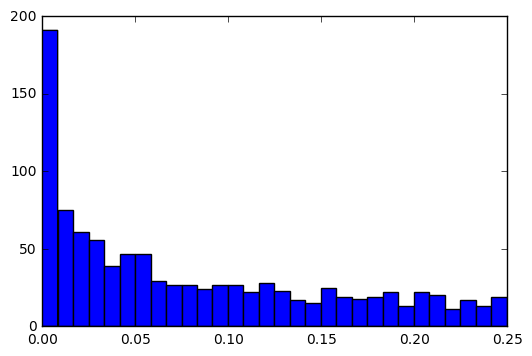

In [8]:
r = np.random.rand(1000)
n,bins,_ = plt.hist((r-0.5)**2, bins=30)

where it also returns the number of elements in each bin, as `n`, and
the bin centres, as `bins`.  The `_` in the third part on the left
hand side is a shorthand for just throwing away the corresponding part
of the return structure.


There is also a call for doing bar plots:

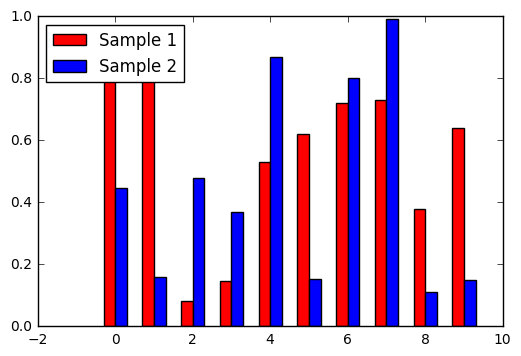

In [9]:
fig, ax = plt.subplots()
samp1 = r[0:10]
samp2 = r[10:20]
bwidth = 0.3
xcoord = np.arange(10)
ax.bar(xcoord-bwidth, samp1, width=bwidth, color='red', label='Sample 1')
ax.bar(xcoord, samp2, width=bwidth, color='blue', label='Sample 2')
ax.legend(loc='upper left')

Note that the first line returns a handle to the axis, as `ax`, that
we can use instead of `plt`

### Scatter plots

(0.081407526398292296, 0.99127785557649606)

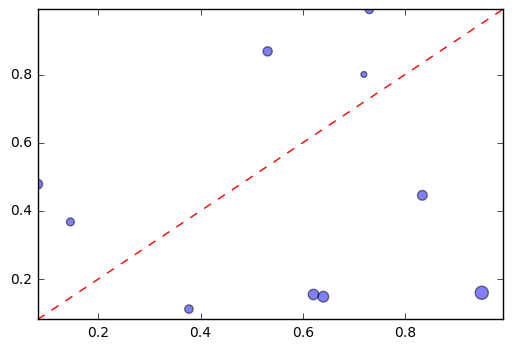

In [10]:
fig, ax = plt.subplots()
# setup some sizes for each point (arbitrarily example here)
ssize = 100*abs(samp1-samp2) + 10 
ax.scatter(samp1, samp2, s=ssize, alpha=0.5)
# now add the y=x line
allsamps = np.hstack((samp1,samp2))
ax.plot([min(allsamps),max(allsamps)],[min(allsamps),max(allsamps)], color='red', linestyle='--')
plt.xlim(min(allsamps),max(allsamps))
plt.ylim(min(allsamps),max(allsamps))

### Subplots

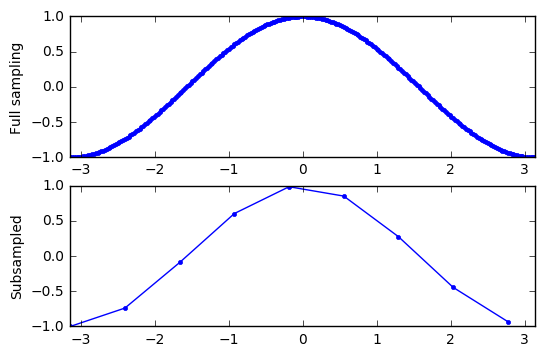

In [11]:
plt.subplot(2, 1, 1)
plt.plot(x,cosx, '.-')
plt.xlim(-np.pi, np.pi)
plt.ylabel('Full sampling')
plt.subplot(2, 1, 2)
plt.plot(x[::30], cosx[::30], '.-')
plt.xlim(-np.pi, np.pi)
plt.ylabel('Subsampled')

### Displaying images

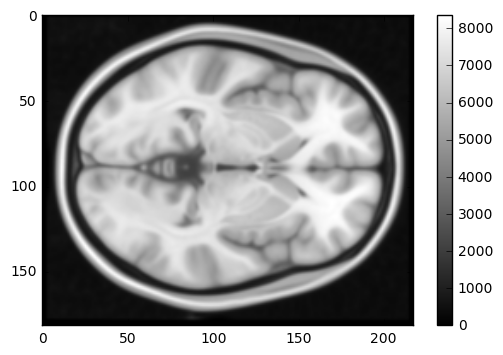

In [12]:
import nibabel as nib
import os.path as op
nim = nib.load(op.expandvars('${FSLDIR}/data/standard/MNI152_T1_1mm.nii.gz'), mmap=False)
imdat = nim.get_data().astype(float)
plt.imshow(imdat[:,:,70], cmap=plt.cm.gray)
plt.colorbar()

### 3D plots

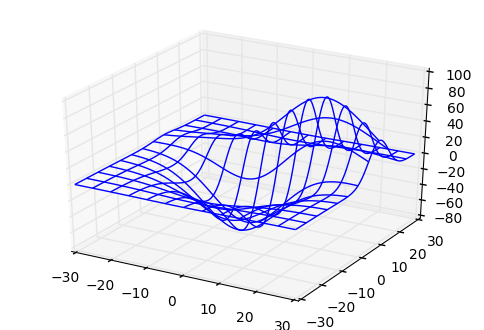

In [13]:
# Taken from https://matplotlib.org/gallery/mplot3d/wire3d.html#sphx-glr-gallery-mplot3d-wire3d-py

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

Surface renderings are many other plots are possible - see 3D examples on
the [matplotlib webpage](https://matplotlib.org/gallery/index.html#mplot3d-examples-index)

## Plotting from standalone scripts

When running from a standalone script, the same `matplotlib` import is required,
but the line `%matplotlib <backend>` should *not* be used.

In a script it is necessary to also _finish_ with `plt.show()` as
otherwise nothing is actually displayed.  For example, the above
examples would setup a plot but the actual graphic would only appear
after the `plt.show()` command was executed.  Furthermore, control is
not returned to the script immediately as the plot is interactive by default.